In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

# Enunciado

Considere el proyecto cuya información se adjunta.  

In [3]:
pregunta_1 = "1.  Dibuje los grafos Roy y Pert. Determine el camino crítico.  "
pregunta_2 = "2.  Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.  "

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))

1.  Dibuje los grafos Roy y Pert. Determine el camino crítico.  

2.  Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.  

In [5]:
#| tbl-cap: "Cuadro de datos del enunciado del ejercicio"
#| label: tbl-datosEnunciado

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, b, m, a, coste_duracion_pert, coste_duracion_tope, duracion_tope
     ('A', '---  ',   6,  2.5, 2, 1600, 1800, 2),
     ('B', '---  ',   6,    6, 6, 2800, 2820, 1),
     ('C', '---  ',   1,    1, 1,  600,  600, 1),
     ('D', '---  ',   3,    3, 3,  600,  607, 2),
     ('E', 'A,B  ',  12,    5, 4, 1600, 2200, 2),
     ('F', 'A,B  ',  12,  2.5, 2, 2000, 2200, 1),
     ('G', 'B,C,P',   6, 1.25, 1,  600,  700, 1),
     ('H', 'B,C,P ',  20,   15, 10, 3500, 3620, 3),
     ('I', 'D    ',  28,   18, 8, 3500, 3503, 17),
     ('J', 'E,M  ',   4,    4, 4, 1500, 1500, 2),
     ('K', 'F    ',   7,    7, 7, 2000, 2000, 3),
     ('L', 'J,K,G',   1,    1, 1, 1000, 1000, 1),
     ('M', 'F    ',   3,    3, 3,  500,  500, 1),
     ('N', 'J,K,G',   1,    1, 1, 1000, 1000, 1),
     ('P', 'D    ',   3,    3, 3, 1000, 1150, 1),

] ,columns=['actividad', 'precedentes', 'b', 'm', 'a',
            'coste_duracion_pert', 'coste_duracion_tope', 'duracion_tope']).set_index('actividad')

datos_enunciado

,precedentes,b,m,a,coste_duracion_pert,coste_duracion_tope,duracion_tope
actividad,,,,,,,
A,---,6,2.50,2,1600,1800,2
B,---,6,6.00,6,2800,2820,1
C,---,1,1.00,1,600,600,1
D,---,3,3.00,3,600,607,2
E,"A,B",12,5.00,4,1600,2200,2
F,"A,B",12,2.50,2,2000,2200,1
G,"B,C,P",6,1.25,1,600,700,1
H,"B,C,P",20,15.00,10,3500,3620,3
I,D,28,18.00,8,3500,3503,17


{{< pagebreak >}}

# Solución
## Apartado 1

In [6]:
display(Markdown(pregunta_1))

1.  Dibuje los grafos Roy y Pert. Determine el camino crítico.  

### Cuadro de prelaciones

Comenzamos construyendo el cuadro de prelaciones. Este cuadro nos permitirá construir los grafos Pert o Roy, si atendemos a la información de las filas; o comprobar si el grafo obtenido es correcto, atendiendo a la información de las columnas.

In [7]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
datos_proyecto=datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='actividad', predecessor='precedentes')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,P
activities,,,,,,,,,,,,,,,
A,,,,,,,,,,,,,,,
B,,,,,,,,,,,,,,,
C,,,,,,,,,,,,,,,
D,,,,,,,,,,,,,,,
E,True,True,,,,,,,,,,,,,
F,True,True,,,,,,,,,,,,,
G,,True,True,,,,,,,,,,,,True
H,,True,True,,,,,,,,,,,,True
I,,,,True,,,,,,,,,,,


### Grafo Roy

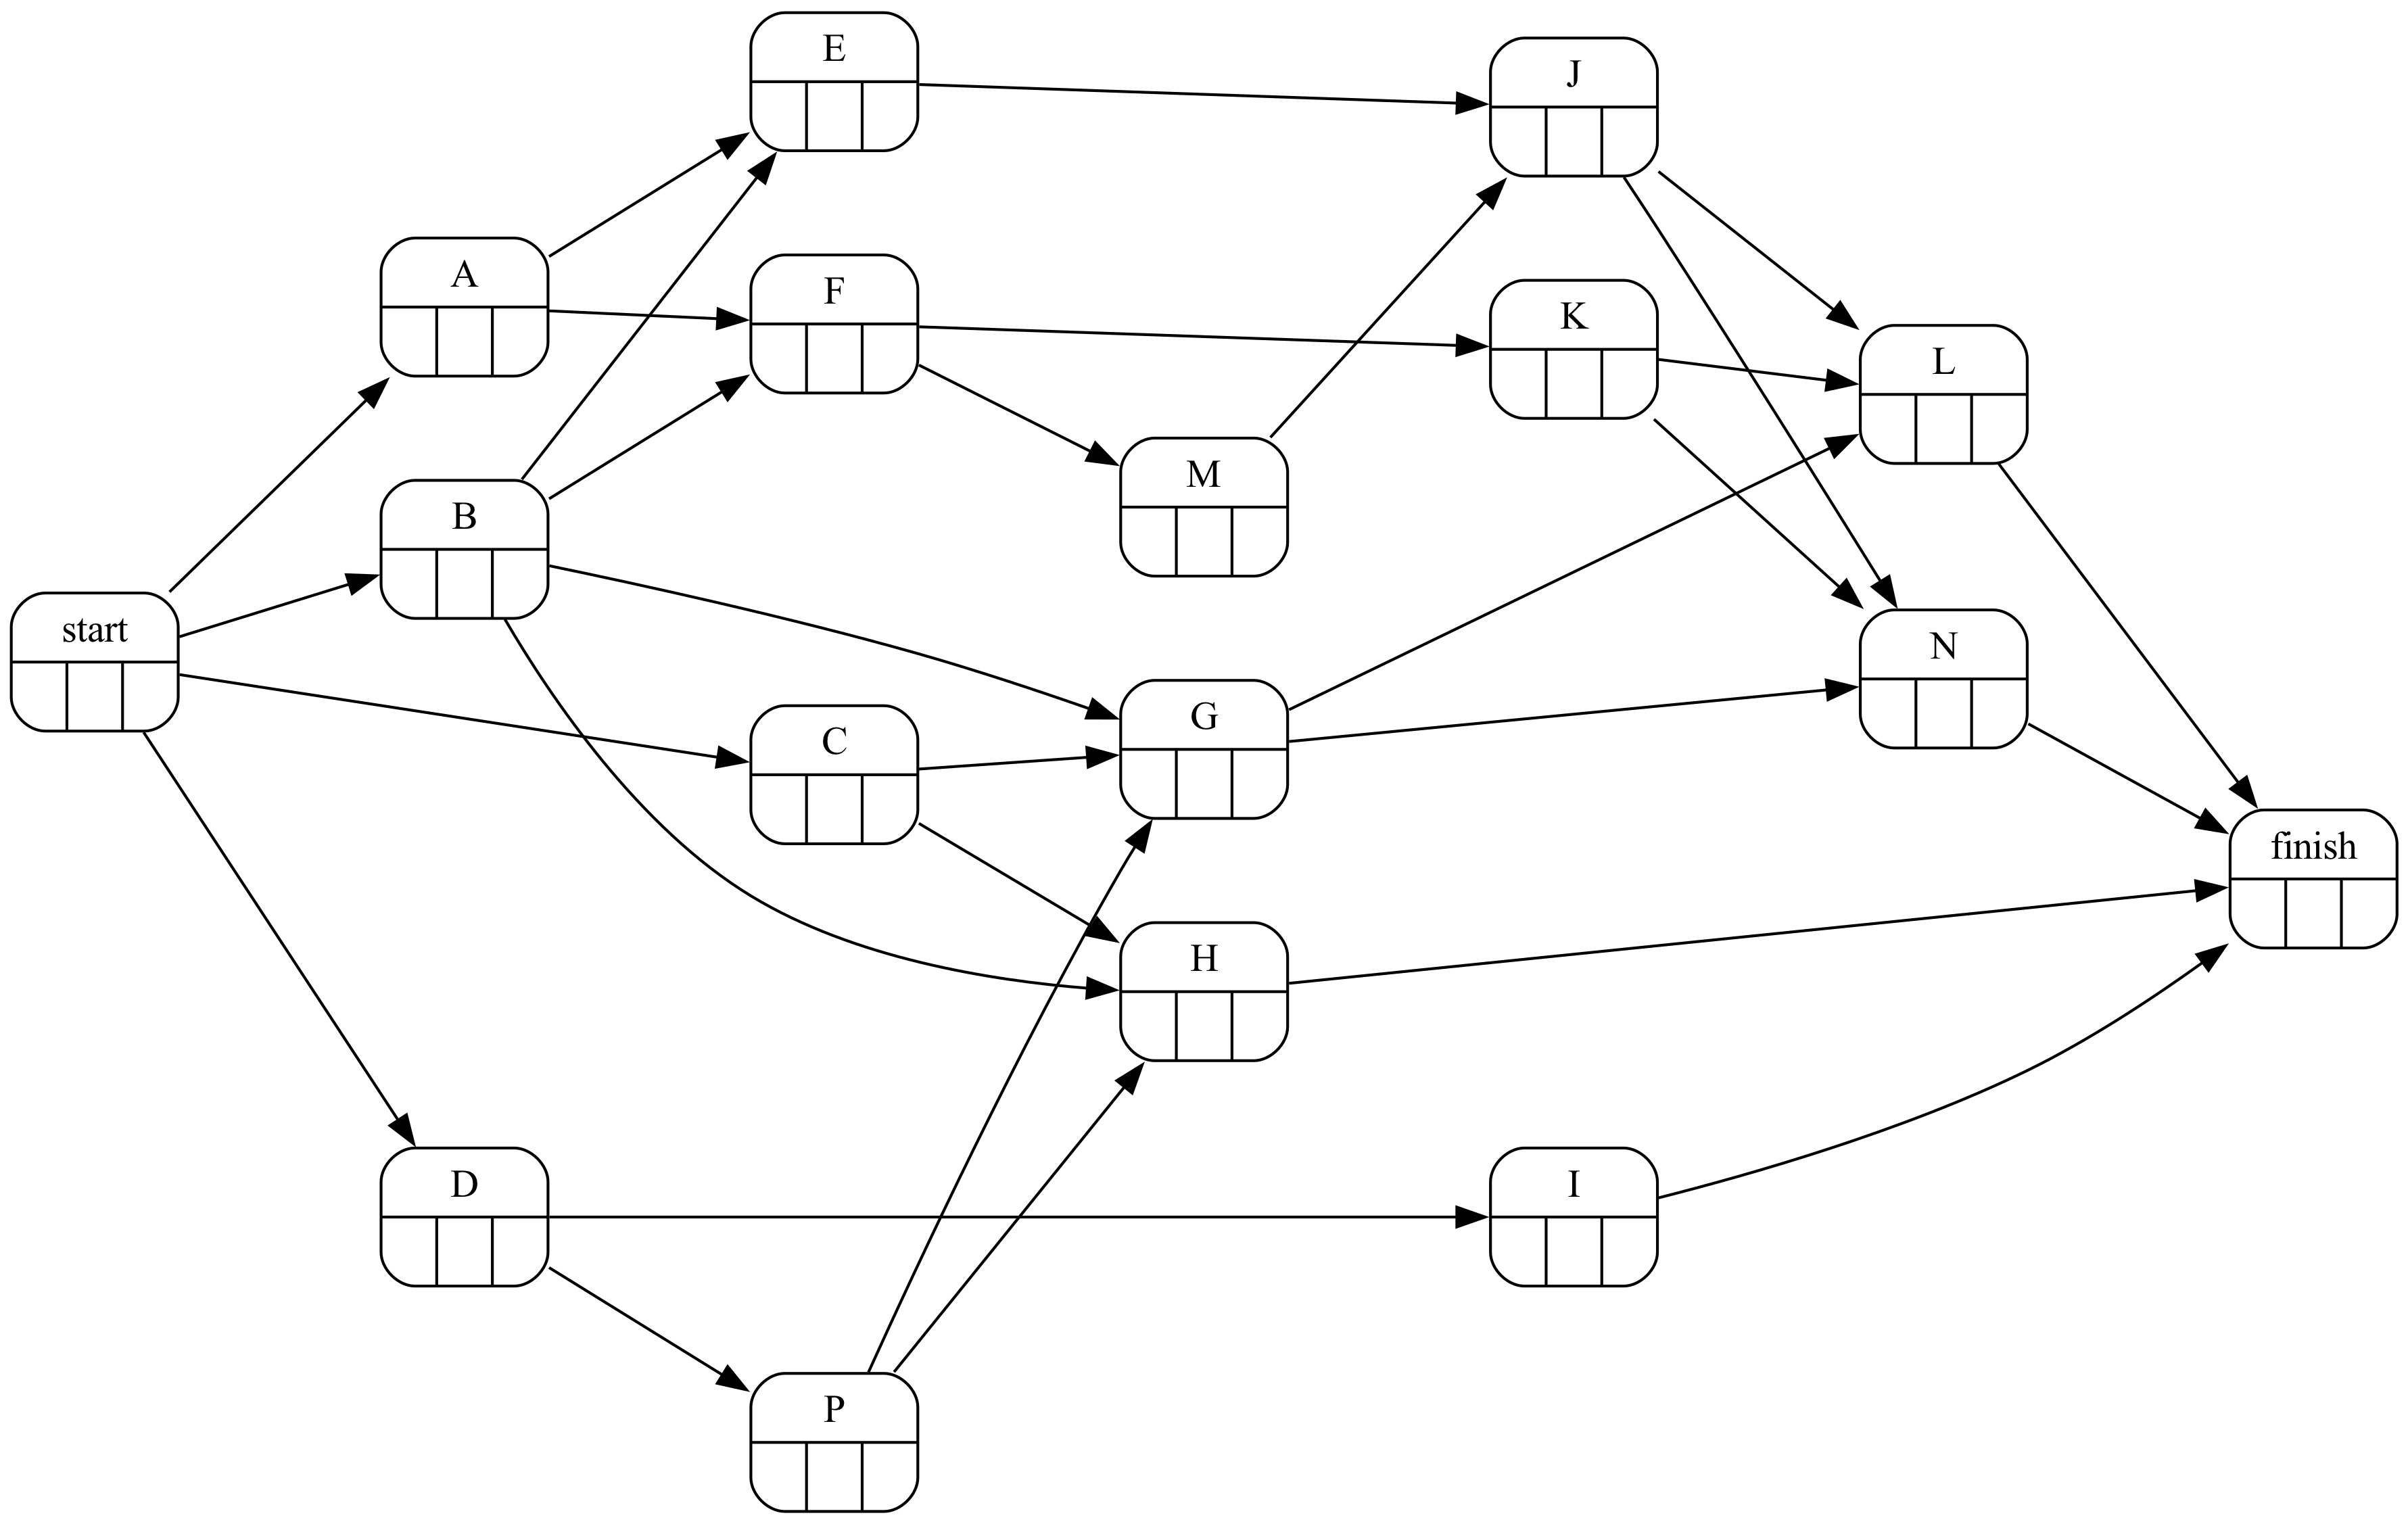

In [8]:
#| fig-cap: "Grafo Roy"
#| label: fig-RoySinTiempos
proyecto = prelaciones.create_project()
proyecto.roy(ranksep=1.0)

### Grafo Pert

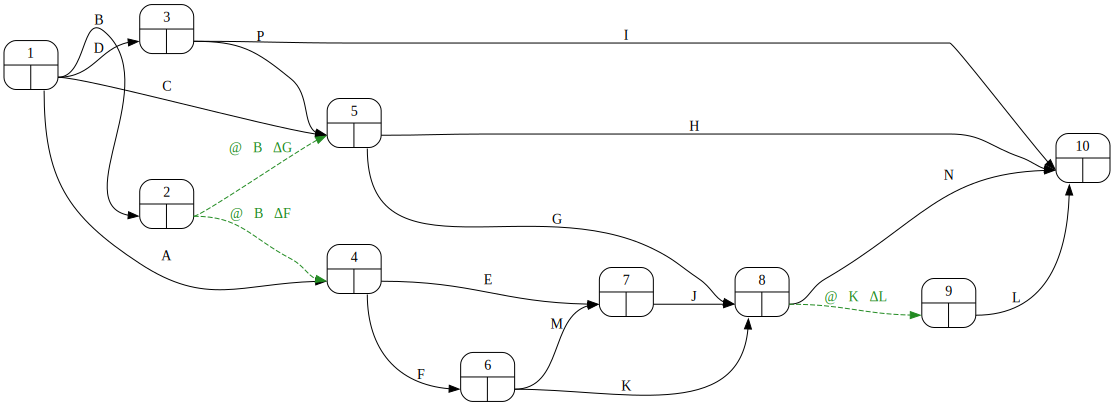

In [9]:
#| fig-cap: "Grafo Pert"
#| label: fig-PertSinTiempos
proyecto.pert(ranksep=1.0)

### Precálculo de variables de interés

A partir de los datos del enunciado podemos calcular la duración media, y el coste unitario de reducción que utilizaremos para contestar las preguntas realizadas.

In [10]:
#| tbl-cap: "Cálculo de la duración media y coste unitario de reducción"
#| label: tbl-precalculos
datos_proyecto['duracion'] = datos_proyecto.eval('(b + 4*m +a)/6')
datos_proyecto['cur'] = datos_proyecto.eval('(coste_duracion_tope - coste_duracion_pert)/(duracion - duracion_tope)')
datos_proyecto[['b', 'm', 'a', 'duracion', 'cur']]

,b,m,a,duracion,cur
actividad,,,,,
A,6,2.50,2,3.0,200.000000
B,6,6.00,6,6.0,4.000000
C,1,1.00,1,1.0,NaN
D,3,3.00,3,3.0,7.000000
E,12,5.00,4,6.0,150.000000
F,12,2.50,2,4.0,66.666667
G,6,1.25,1,2.0,100.000000
H,20,15.00,10,15.0,10.000000
I,28,18.00,8,18.0,3.000000


### Matriz de Zaderenko

In [11]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(datos_proyecto['duracion'])

,1,2,3,4,5,6,7,8,9,10,early
1,,6.0,3.0,3.0,1.0,,,,,,0.0
2,,,,0.0,0.0,,,,,,6.0
3,,,,,3.0,,,,,18.0,3.0
4,,,,,,4.0,6.0,,,,6.0
5,,,,,,,,2.0,,15.0,6.0
6,,,,,,,3.0,7.0,,,10.0
7,,,,,,,,4.0,,,13.0
8,,,,,,,,,0.0,1.0,17.0
9,,,,,,,,,,1.0,17.0
10,,,,,,,,,,,21.0


Los tiempos tempranos y tardíos han resultado ser

In [12]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
resultados_pert = proyecto.calculate_pert(datos_proyecto['duracion'])
resultados_pert['nodes']

,early,late
1,0,0
2,6,6
3,3,3
4,6,9
5,6,6
6,10,13
7,13,16
8,17,20
9,17,20
10,21,21


{{< pagebreak >}}

### Holguras

In [13]:
#| tbl-cap: "Valores de la holgura total de las actividades"
#| label: tbl-Holguras
resultados_pert['activities']

,H_total
@∇B⤑ΔF,3
@∇B⤑ΔG,0
@∇K⤑ΔL,3
A,6
B,0
C,5
D,0
E,4
F,3
G,12


### Camino crítico

In [14]:
proyecto.display_critical_path(datos_proyecto['duracion'])

- Route_15 :	B, H <br> 

- Route_19 :	D, I <br> 

- Route_22 :	D, H, P <br> 

### Grafo PERT con indicación de tiempos y rutas del camino crítico

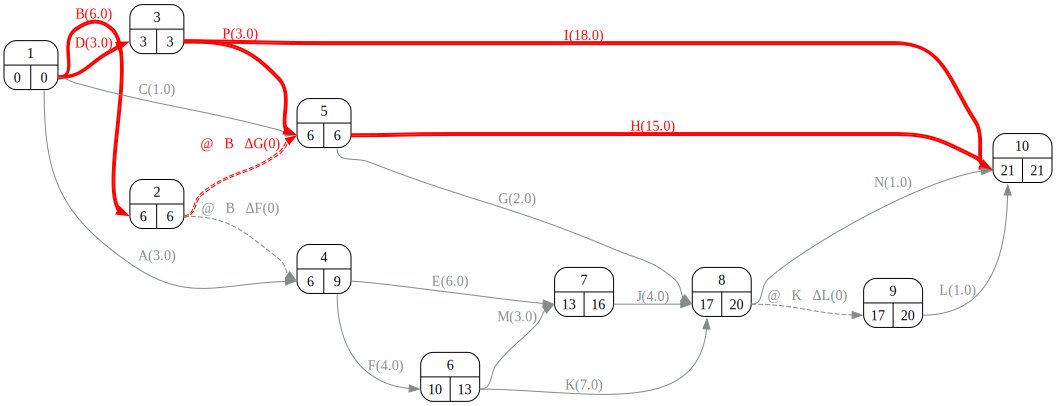

In [15]:
#| fig-cap: "Grafo Pert con tiempos, y rutas críticas"
#| label: fig-PertConTiempos
proyecto.pert(durations=datos_proyecto['duracion'])

### Grafo Roy con indicación de tiempos y rutas del camino crítico

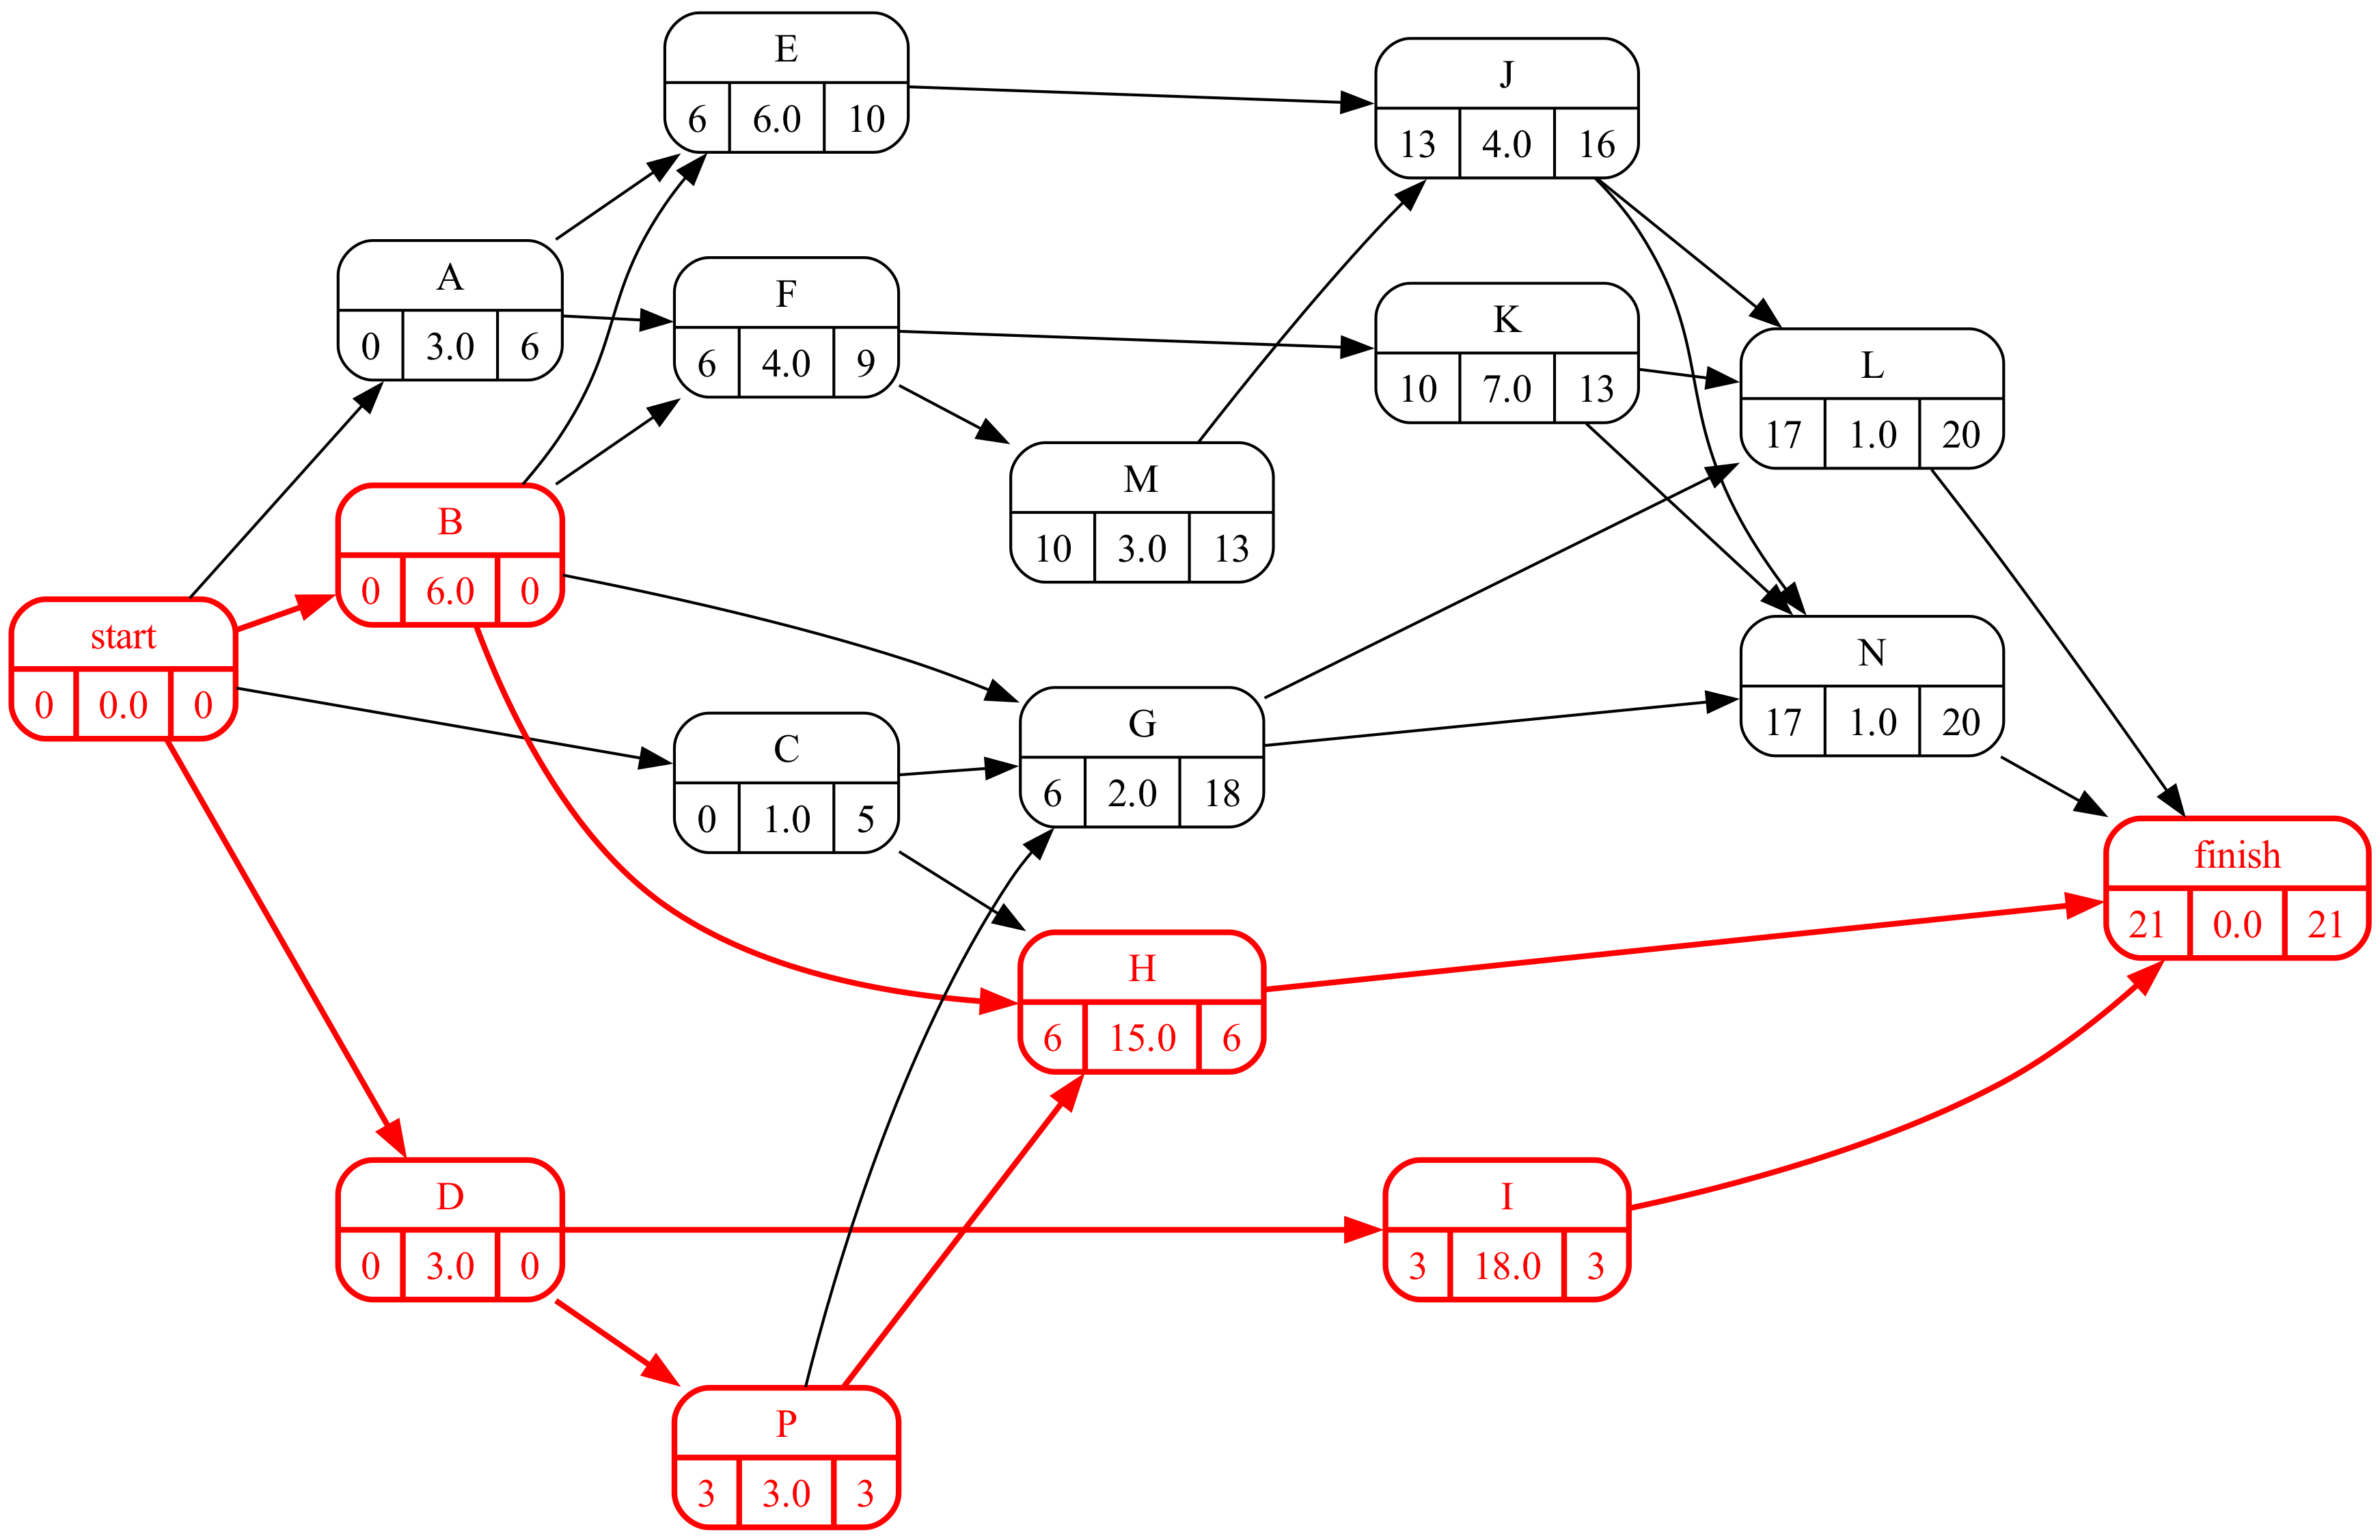

In [16]:
#| fig-cap: "Grafo Roy con tiempos, y rutas críticas"
#| label: fig-RoyConTiempos
proyecto.roy(durations=datos_proyecto['duracion'])

{{< pagebreak >}}

## Apartado 2.

In [17]:
display(Markdown(pregunta_2))

2.  Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.  

Se aborda la solución de este apartado mediante la técnica de reducción de la duración del proyecto con mínimo coste.

In [18]:
#| include: false
#| echo: false
ackoff, best_option, duration, available = proyecto.ackoff( durations=datos_proyecto['duracion'],
                                                            min_durations=datos_proyecto['duracion_tope'],
                                                            costs=datos_proyecto['cur'],
                                                            reduction=2)

In [19]:
#| tbl-cap: "Cuadro del algoritmo de Ackoff Sasieni"
#| label: tbl-ackoffƒ
ackoff

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,P,0,1,2
Route_1,200.0,,,,150.0,,,,,0.0,,,,,,14.0,14.0,14.0
Route_2,200.0,,,,150.0,,,,,0.0,,,,,,14.0,14.0,14.0
Route_3,200.0,,,,,66.7,,,,,0.0,,,,,15.0,15.0,15.0
Route_4,200.0,,,,,66.7,,,,,0.0,,,,,15.0,15.0,15.0
Route_5,200.0,,,,,66.7,,,,0.0,,,0.0,,,15.0,15.0,15.0
Route_6,200.0,,,,,66.7,,,,0.0,,,0.0,,,15.0,15.0,15.0
Route_7,,4.0,,,150.0,,,,,0.0,,,,,,17.0,16.0,16.0
Route_8,,4.0,,,150.0,,,,,0.0,,,,,,17.0,16.0,16.0
Route_9,,4.0,,,,66.7,,,,,0.0,,,,,18.0,17.0,17.0
Route_10,,4.0,,,,66.7,,,,,0.0,,,,,18.0,17.0,17.0


Las actividades a recortar en cada iteración son:

In [20]:
for item, value in best_option.items():
    print(f"Actividades a recortar en iteración {item}: {value}")

Actividades a recortar en iteración 0: ['D', 'B']
Actividades a recortar en iteración 1: ['H', 'I']


El grafo Roy con indicación de tiempos y rutas críticas tras la reducción de la duración es el siguiente:

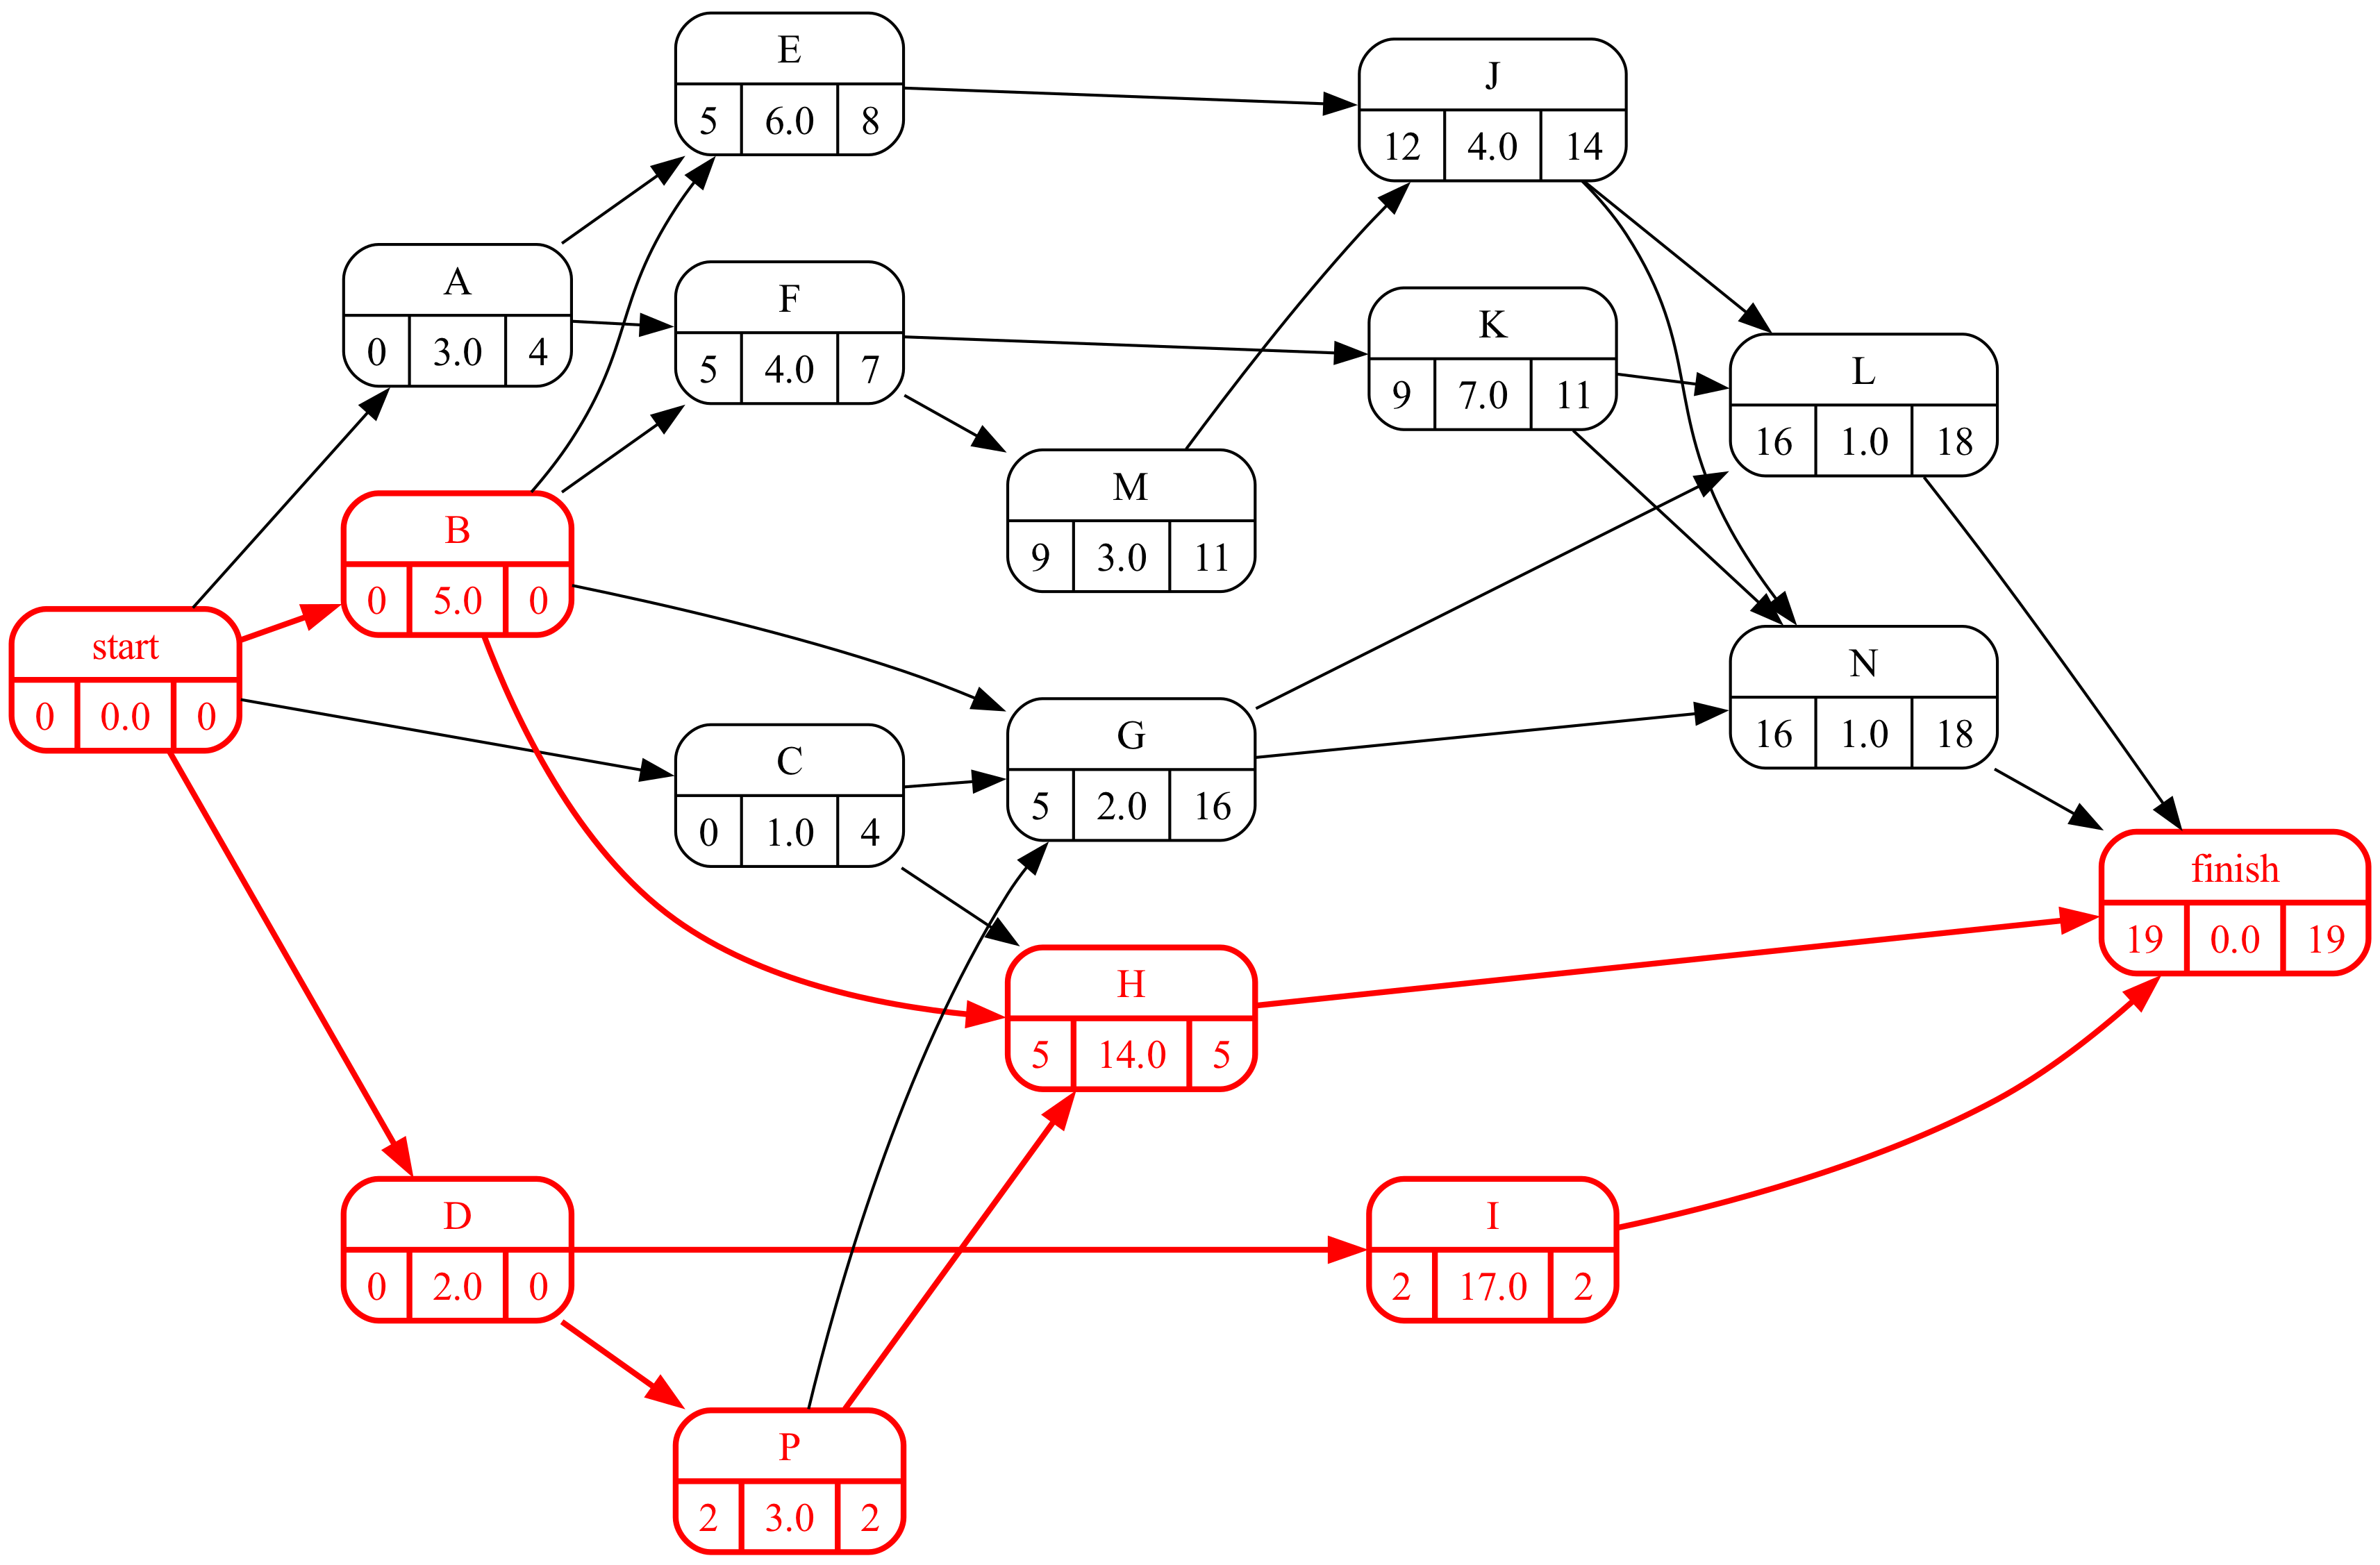

In [21]:
#| fig-cap: "Grafo Roy con indicación de tiempos tras la reducción del proyecto"
#| label: fig-RoyReduccionTiempos
proyecto.roy(durations=duration)